In [1]:
def LagInterpolation(zh, zl, yh, yl, y):
    z = zl + ((zh - zl) * (y - yl)/(yh - yl))
    return z

def RK(d2ydx2, dydx, x0, y0, z0, xf, st):
    
    x = [x0]
    y = [y0]
    z = [z0]      # dy/dx

    n = int((xf-x0)/st)     # no. of steps
    for i in range(n):
        x.append(x[i] + st)
        k1 = st * dydx(x[i], y[i], z[i])
        l1 = st * d2ydx2(x[i], y[i], z[i])
        k2 = st * dydx(x[i] + st/2, y[i] + k1/2, z[i] + l1/2)
        l2 = st * d2ydx2(x[i] + st/2, y[i] + k1/2, z[i] + l1/2)
        k3 = st * dydx(x[i] + st/2, y[i] + k2/2, z[i] + l2/2)
        l3 = st * d2ydx2(x[i] + st/2, y[i] + k2/2, z[i] + l2/2)
        k4 = st * dydx(x[i] + st, y[i] + k3, z[i] + l3)
        l4 = st * d2ydx2(x[i] + st, y[i] + k3, z[i] + l3)

        y.append(y[i] + (k1 + 2*k2 + 2*k3 + k4)/6)
        z.append(z[i] + (l1 + 2*l2 + 2*l3 + l4)/6)

    return x, y, z

In [2]:
def shoot(d2ydx2, dydx, x0, y0, xf, yf, z_g1, z_g2, st, tol):
    #x0: Lower boundary value of x; xf: Upper boundary value of x
    #y0 = y(x0) ; yf = y(xf); z = dy/dx
    x, y, z = RK(d2ydx2, dydx, x0, y0, z_g1, xf, st)
    yn = y[-1]
    
    if abs(yn - yf) > tol:
        if yn < yf:
            zl = z_g1
            yl = yn

            x, y, z = RK(d2ydx2, dydx, x0, y0, z_g2, xf, st)
            yn = y[-1]

            if yn > yf:
                zh = z_g2
                yh = yn

                # calculate zeta using Lagrange interpolation
                z = LagInterpolation(zh, zl, yh, yl, yf)

                # using this zeta to solve using RK4
                x, y, z = RK(d2ydx2, dydx, x0, y0, z, xf, st)
                return x, y, z

            else:
                print("Bracketing failed!")


        elif yn > yf:
            zh = z_g1
            yh = yn

            x, y, z = RK(d2ydx2, dydx, x0, y0, z_g2, xf, st)
            yn = y[-1]

            if yn < yf:
                zl = z_g2
                yl = yn

                # calculate zeta using Lagrange interpolation
                z = LagInterpolation(zh, zl, yh, yl, yf)

                x, y, z = RK(d2ydx2, dydx, x0, y0, z, xf, st)
                return x, y, z

            else:
                print("Bracketing FAILED")


    else:
        return x, y, z 

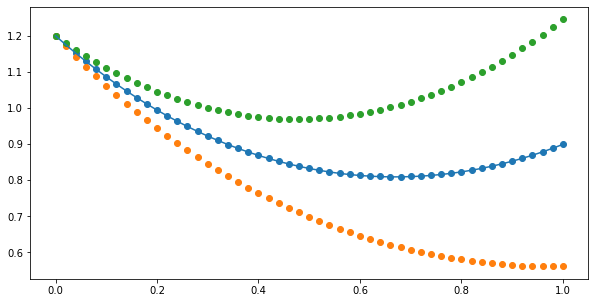

In [4]:
import matplotlib.pyplot as plt
import math
import numpy as np

def dydx(x, y, z):
    return z
def d2ydx2(x, y, z):
    return 2*y
x_1, y_1, z_1 = shoot(d2ydx2, dydx, 0, 1.2, 1, 0.9, -1.5, -1, 0.02, 0.000001)
x_2, y_2, z_2 = shoot(d2ydx2, dydx, 0, 1.2, 1, 0.5614, -0.5, -2, 0.02, 0.000001)
x_3, y_3, z_3 = shoot(d2ydx2, dydx, 0, 1.2, 1, 1.2455, -2, -1, 0.02, 0.000001)
e = 2.71828
fig = plt.figure(figsize = (10, 5))
plt.scatter(x_1,y_1) #blue
plt.scatter(x_2,y_2) #orange
plt.scatter(x_3,y_3) #green
xx = np.linspace(0, 1, 100)
yy = (0.157*(e**(math.sqrt(2)*xx))) + (1.043*(e**(-math.sqrt(2)*xx)))
plt.plot(xx, yy)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
# Creating vectors X and Y
x = np.linspace(-1, 1, 100)
y = x
 
fig = plt.figure(figsize = (10, 5))
# Create the plot
plt.plot(x, y)
 
# Show the plot
plt.show()

